In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib

In [11]:
# Set seed
np.random.seed(111)


# Function to generate test data
def CreateDataSet(Number):
    random_status=[]
    random_states=[]
    output = []
    for i in range(Number):
        #Create Weekely Monday date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        #Create random data
        data = np.random.randint(low=25, high=1000, size=len(rng))
        
        #Status
        status=[1,2,3]
        
        #Make random list of status
        for i in range(len(rng)):
            random_status.append(status[np.random.randint(low=0,high=len(status))])
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        #Make random list of States
        for i in range(len(rng)):
            random_states.append(states[np.random.randint(low=0,high=len(states))])
            
        output.extend(zip(random_states, random_status, data, rng))
    return output
            
        

In [12]:
dataset=CreateDataSet(4)

In [18]:
df=pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [15]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [22]:
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


In [44]:
df=pd.read_excel('Lesson3.xlsx')
df.dtypes

State                    object
Status                    int64
CustomerCount             int64
StatusDate       datetime64[ns]
dtype: object

In [45]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


Prepare Data
This section attempts to clean up the data for analysis.

Make sure the state column is all in upper case
Only select records where the account status is equal to "1"
Merge (NJ and NY) to NY in the state column
Remove any outliers (any odd results in the data set)

In [46]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [47]:
df['State']=df.State.apply(lambda x:x.upper())

In [48]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [49]:
df=df[df['Status']==1]

In [52]:
df['State'][df['State'] == 'NJ'] = 'NY'
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

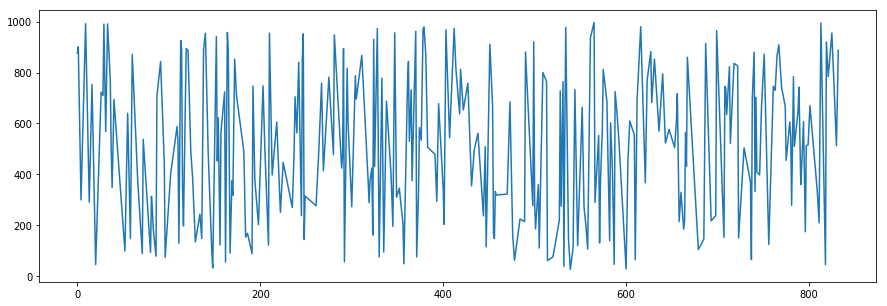

In [54]:
df['CustomerCount'].plot(figsize=(15,5))

In [55]:
df_ny = df[df['State']=='NY']
df_ny.head(10)

,State,Status,CustomerCount,StatusDate
9,NY,1,992,2009-03-09
16,NY,1,753,2009-04-27
29,NY,1,990,2009-07-27
36,NY,1,772,2009-09-14
38,NY,1,349,2009-09-28
40,NY,1,694,2009-10-12
55,NY,1,640,2010-01-25
66,NY,1,375,2010-04-12
72,NY,1,538,2010-05-24
81,NY,1,314,2010-07-26


In [59]:
Daily = df.groupby(['State','StatusDate']).sum()
Daily.head(10)

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       4           3351
      2009-04-06       4           1692
      2009-07-06       4           1736
      2009-07-20       4           2317
      2009-08-24       4           3072
      2009-09-21       4           1734
      2009-10-05       4           1418
      2010-01-04       4            804
      2010-03-01       4           2262
      2010-11-01       4           2830

In [60]:
del Daily['Status']
Daily.head(10)

CustomerCount
State StatusDate               
FL    2009-01-12           3351
      2009-04-06           1692
      2009-07-06           1736
      2009-07-20           2317
      2009-08-24           3072
      2009-09-21           1734
      2009-10-05           1418
      2010-01-04            804
      2010-03-01           2262
      2010-11-01           2830

In [62]:
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-02-02 00:00:00, 2009-03-09 00:00:00, 2009-04-06 00:00:00, 2009-04-27 00:00:00, 2009-05-25 00:00:00, 2009-07-06 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-24 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2010-01-04 00:00:00, 2010-01-25 00:00:00, 2010-02-15 00:00:00, 2010-03-01 00:00:00, 2010-04-12 00:00:00, 2010-05-17 00:00:00, 2010-05-24 00:00:00, 2010-07-19 00:00:00, 2010-07-26 00:00:00, 2010-08-02 00:00:00, 2010-08-09 00:00:00, 2010-08-30 00:00:00, 2010-09-06 00:00:00, 2010-10-04 00:00:00, 2010-11-01 00:00:00, 2010-11-08 00:00:00, 2010-12-20 00:00:00, 2011-02-07 00:00:00, 2011-02-14 00:00:00, 2011-02-21 00:00:00, 2011-03-07 00:00:00, 2011-03-14 00:00:00, 2011-03-21 00:00:00, 2011-03-28 00:00:00, 2011-04-18 00:00:00, 2011-05-02 00:00:00, 2011-05-23 00:00:00, 2011-06-06 00:00:00, 2011-06-2

In [63]:
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [64]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-02-02', '2009-03-09',
               '2009-04-06', '2009-04-27', '2009-05-25', '2009-07-06',
               '2009-07-20', '2009-07-27', '2009-08-10', '2009-08-24',
               '2009-09-14', '2009-09-21', '2009-09-28', '2009-10-05',
               '2009-10-12', '2010-01-04', '2010-01-25', '2010-02-15',
               '2010-03-01', '2010-04-12', '2010-05-17', '2010-05-24',
               '2010-07-19', '2010-07-26', '2010-08-02', '2010-08-09',
               '2010-08-30', '2010-09-06', '2010-10-04', '2010-11-01',
               '2010-11-08', '2010-12-20', '2011-02-07', '2011-02-14',
               '2011-02-21', '2011-03-07', '2011-03-14', '2011-03-21',
               '2011-03-28', '2011-04-18', '2011-05-02', '2011-05-23',
               '2011-06-06', '2011-06-27', '2011-08-01', '2011-08-15',
               '2011-08-29', '2011-09-12', '2011-10-03', '2011-10-31',
               '2011-11-07', '2011-12-05', '2011-12-12', '2011-12-19',
      

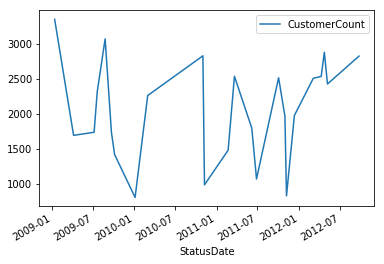

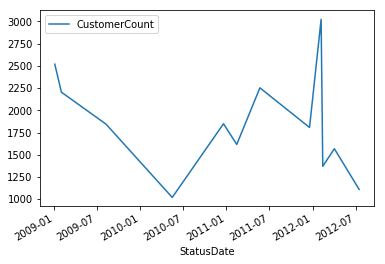

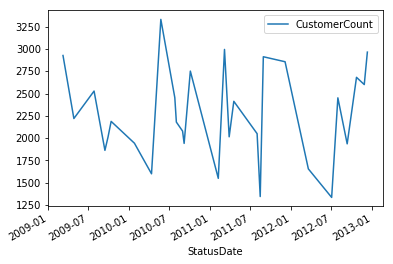

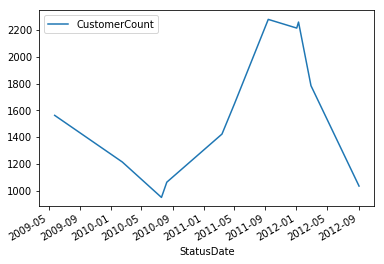

In [66]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

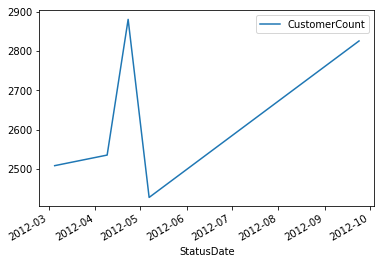

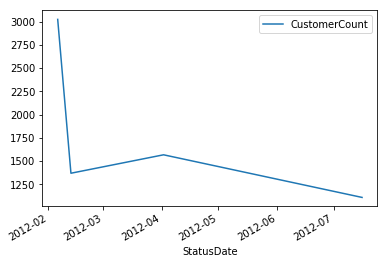

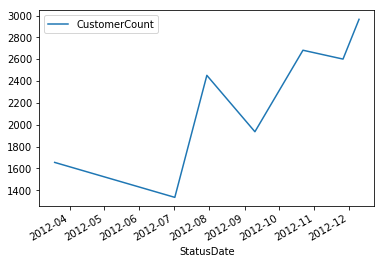

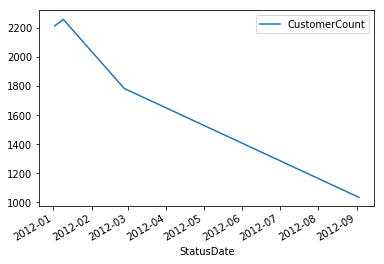

In [68]:
Daily.loc['FL']['2012'].plot()
Daily.loc['GA']['2012'].plot()
Daily.loc['NY']['2012'].plot()
Daily.loc['TX']['2012'].plot()